<a href="https://colab.research.google.com/github/Nick-Achee/LSTM---1st-project/blob/master/LSTM_uco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Description: 

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote
df = web.DataReader('USO', data_source='yahoo', start='2012-01-01', end='2020-04-20')
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,39.750000,39.240002,39.240002,39.689999,12369900,39.689999
2012-01-04,39.959999,39.380001,39.500000,39.770000,13812800,39.770000
2012-01-05,39.849998,39.119999,39.490002,39.169998,11799600,39.169998
2012-01-06,39.389999,38.860001,39.389999,39.220001,9760600,39.220001
2012-01-09,39.139999,38.560001,39.110001,39.080002,7509300,39.080002
...,...,...,...,...,...,...
2020-04-14,4.800000,4.530000,4.760000,4.660000,191872000,4.660000
2020-04-15,4.470000,4.300000,4.430000,4.430000,219222000,4.430000
2020-04-16,4.410000,4.150000,4.400000,4.360000,238540900,4.360000


In [ ]:

#Get the number of rows and columns in the data set
df.shape

(2087, 6)

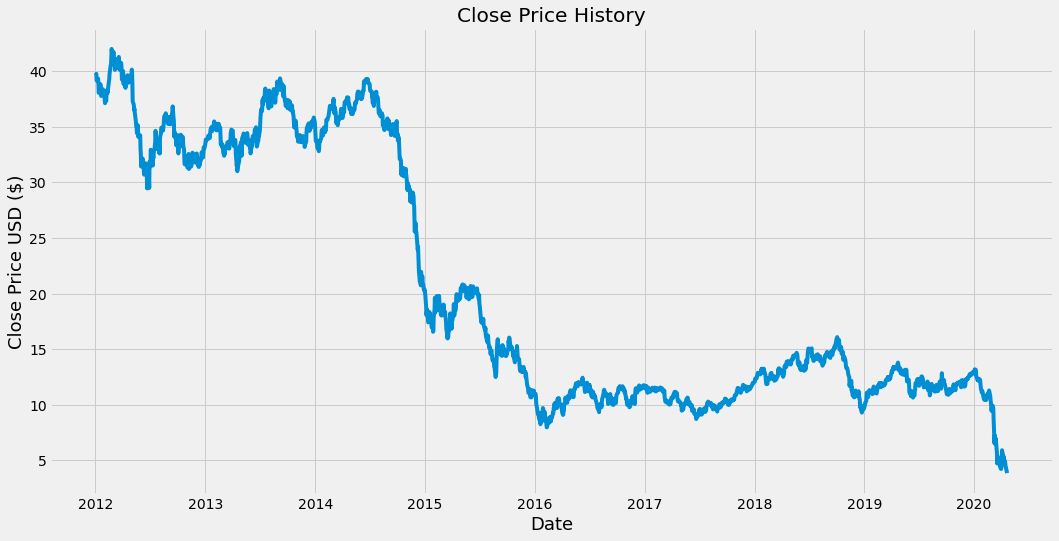

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1670

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.93921132],
       [0.94130753],
       [0.92558626],
       ...,
       [0.01349404],
       [0.00956374],
       [0.        ]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.93921132, 0.94130753, 0.92558626, 0.92689644, 0.92322818,
       0.93004066, 0.91903576, 0.89650211, 0.89912227, 0.91562957,
       0.91667767, 0.91300931, 0.88916547, 0.90514872, 0.89755011,
       0.90410062, 0.90462467, 0.90279053, 0.89519193, 0.89021358,
       0.87868473, 0.87213422, 0.88418713, 0.87737464, 0.89361987,
       0.89597805, 0.90357666, 0.895454  , 0.91300931, 0.91693965,
       0.92584834, 0.9284685 , 0.94078348, 0.96253121, 0.96279318,
       0.98323072, 1.        , 0.97825238, 0.96803361, 0.9714398 ,
       0.99318752, 0.96750955, 0.97274998, 0.95074028, 0.96331723,
       0.96881963, 0.97589419, 0.96567542, 0.96908171, 0.95807681,
       0.95467052, 0.97432203, 0.98113461, 0.95860086, 0.96462731,
       0.95100225, 0.96541334, 0.96750955, 0.9659374 , 0.95231233])]
[0.9287305770295231]

[array([0.93921132, 0.94130753, 0.92558626, 0.92689644, 0.92322818,
       0.93004066, 0.91903576, 0.89650211, 0.89912227, 0.91562957,
       0.91667767, 0.91300931, 0.889

In [ ]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1610, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1610/1610 [==============================] - 59s 37ms/step - loss: 0.0015


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.5562558092282041

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


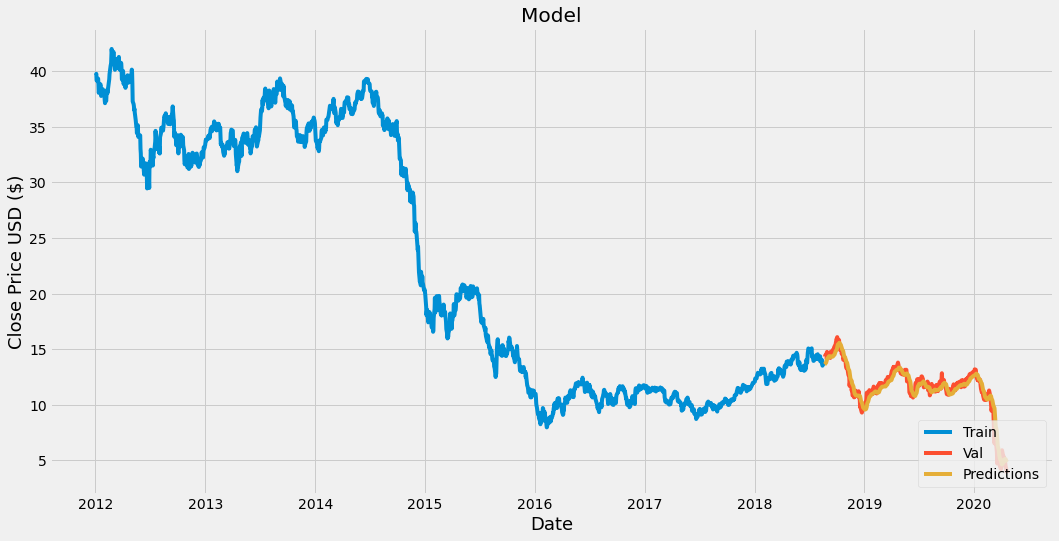

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-22,14.270,13.620086
2018-08-23,14.270,13.643503
2018-08-24,14.430,13.696395
2018-08-27,14.500,13.776546
2018-08-28,14.430,13.871999
...,...,...
2020-04-14,4.660,5.119804
2020-04-15,4.430,5.100083
2020-04-16,4.360,5.036513


In [ ]:
#Get the quote
apple_quote = web.DataReader('USO', data_source='yahoo', start='2012-04-20', end='2020-04-20')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[4.694656]]
